In [1]:
import re
import matplotlib
import pandas as pd
import seaborn as sn
import prince
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency

matplotlib.rcParams.update({'font.size': 16})

In [37]:
# Variáveis do algoritmo
input_dataframe = "buscape_final.csv"

alpha = 0.05 # significância

In [38]:
data = pd.read_csv(input_dataframe)
data = data.drop(['Unnamed: 0'], axis=1)
data

,comentario,categoria,nota,brinquedo,carro,casa,comida,computador,eletrodomestico,comentario_limpo,sentimento_valor,sentimento,nota_escrita
0,"['erro', 'tipo', 'brinquedo', 'agrada', 'grand...",brinquedo,5,1,0,0,0,0,0,erro tipo brinquedo agrada grand...,0.8402,Positivo,Muito Alta
1,"['erro', 'tipo', 'brinquedo', 'agrada', 'grand...",brinquedo,5,1,0,0,0,0,0,erro tipo brinquedo agrada grand...,0.8402,Positivo,Muito Alta
2,"['comprei', 'televisão', 'início', 'filha', 'p...",brinquedo,5,1,0,0,0,0,0,comprei televisão início filha p...,0.9781,Positivo,Muito Alta
3,"['jogos', 'emocionantes', 'joguei', 'gosto', '...",brinquedo,5,1,0,0,0,0,0,jogos emocionantes joguei gosto ...,0.9382,Positivo,Muito Alta
4,"['acho', 'lindo', 'produto', 'demais', 'amei',...",brinquedo,4,1,0,0,0,0,0,acho lindo produto demais amei ...,0.9479,Positivo,Alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43158,"['sala', 'pequena', 'então', 'maximo', 'peca',...",computador,4,0,0,0,0,1,0,sala pequena então maximo peca ...,0.6808,Positivo,Alta
43159,"['hiperx', 'ssd', 'kingston', 'recomendadíssim...",computador,5,0,0,0,0,1,0,hiperx ssd kingston recomendadíssim...,0.2716,Positivo,Muito Alta
43160,"['completo', 'além', 'camera', 'som', 'ótima',...",computador,4,0,0,0,0,1,0,completo além camera som ótima ...,0.4939,Positivo,Alta
43161,"['máquina', 'desempenho', 'bom', 'gostei', 'pr...",computador,3,0,0,0,0,1,0,máquina desempenho bom gostei pr...,0.8481,Positivo,Neutra


<AxesSubplot:>

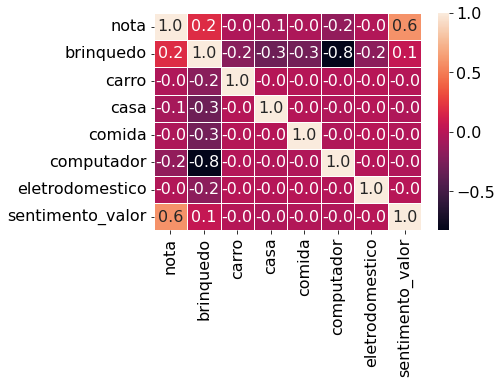

In [4]:
correlation = data.corr()

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [5]:
data['nota_escrita'].value_counts(ascending=False)

Muito Alta     459222
Alta           152564
Muito Baixa     53221
Neutra          35947
Baixa           14929
Name: nota_escrita, dtype: int64

In [6]:
data['categoria'].value_counts(ascending=False)

brinquedo          635838
computador          56923
casa                 9049
comida               7437
carro                3549
eletrodomestico      3087
Name: categoria, dtype: int64

In [7]:
data['sentimento'].value_counts(ascending=False)

Positivo    634956
Neutro       52281
Negativo     28646
Name: sentimento, dtype: int64

In [8]:
 # or choose your own alpha here
table_categoria_sentimento = pd.crosstab(data['categoria'], 
                            data['sentimento'],
                                margins = False)

chi2_statistic, p_value, dof, ex = stats.chi2_contingency( table_categoria_sentimento )
reject_H0 = p_value < alpha
chi2_statistic, alpha, p_value, reject_H0


(17736.664725063292, 0.05, 0.0, True)

In [9]:
chi2_spy, p, dof, expect = chi2_contingency(table_categoria_sentimento)
chi2_spy, p, dof, expect

(17736.664725063292,
 0.0,
 10,
 array([[2.54430058e+04, 4.64353064e+04, 5.63959688e+05],
        [1.42012946e+02, 2.59183790e+02, 3.14780326e+03],
        [3.62094999e+02, 6.60849285e+02, 8.02605572e+03],
        [2.97590950e+02, 5.43124780e+02, 6.59628427e+03],
        [2.27776921e+03, 4.15709182e+03, 5.04881390e+04],
        [1.23526054e+02, 2.25443888e+02, 2.73803006e+03]]))

In [10]:
table = sm.stats.Table(table_categoria_sentimento)
std_residue_categoria_sentimento = table.standardized_resids

[Text(0.5, 0, 'Negativo'), Text(1.5, 0, 'Neutro'), Text(2.5, 0, 'Positivo')]

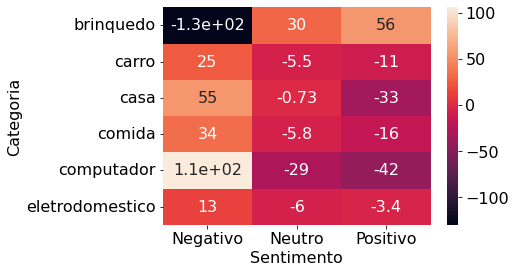

In [11]:
ax = sn.heatmap(std_residue_categoria_sentimento, annot=True)
ax.set_ylabel('Categoria', fontsize=16)
ax.set_xlabel('Sentimento', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), size = 16)
ax.set_xticklabels(ax.get_xticklabels(), size = 16)


In [12]:
table_categoria_nota = pd.crosstab(data['categoria'], 
                            data['nota'],
                                margins = False)

chi2_statistic, p_value, dof, ex = stats.chi2_contingency( table_categoria_nota )
reject_H0 = p_value < alpha
chi2_statistic, alpha, p_value, reject_H0

(49579.65104572243, 0.05, 0.0, True)

In [13]:
chi2_spy, p, dof, expect = chi2_contingency(table_categoria_nota)
chi2_spy, p, dof, expect

(49579.65104572243,
 0.0,
 20,
 array([[4.72702023e+04, 1.32597443e+04, 3.19276594e+04, 1.35505367e+05,
         4.07875027e+05],
        [2.63843853e+02, 7.40107266e+01, 1.78207756e+02, 7.56338167e+02,
         2.27659950e+03],
        [6.72731199e+02, 1.88707542e+02, 4.54382075e+02, 1.92845987e+03,
         5.80471932e+03],
        [5.52890035e+02, 1.55090948e+02, 3.73437893e+02, 1.58492165e+03,
         4.77065947e+03],
        [4.23183535e+03, 1.18707033e+03, 2.85830377e+03, 1.21310334e+04,
         3.65147572e+04],
        [2.29497316e+02, 6.43761942e+01, 1.55009113e+02, 6.57879944e+02,
         1.98023743e+03]]))

In [14]:
table = sm.stats.Table(table_categoria_nota)
std_residue_categoria_nota = table.standardized_resids

[Text(0.5, 0, '1'),
 Text(1.5, 0, '2'),
 Text(2.5, 0, '3'),
 Text(3.5, 0, '4'),
 Text(4.5, 0, '5')]

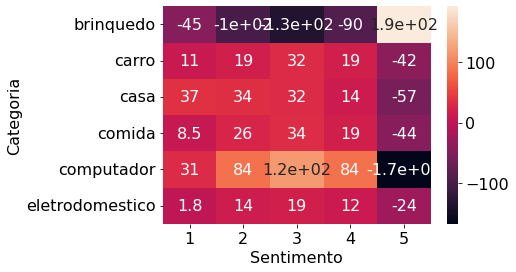

In [15]:
ax = sn.heatmap(std_residue_categoria_nota, annot=True)
ax.set_ylabel('Categoria', fontsize=16)
ax.set_xlabel('Sentimento', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), size = 16)
ax.set_xticklabels(ax.get_xticklabels(), size = 16)

In [16]:
table_nota_sentimento = pd.crosstab(data['nota'], 
                            data['sentimento'],
                                margins = False)

chi2_statistic, p_value, dof, ex = stats.chi2_contingency( table_nota_sentimento )
reject_H0 = p_value < alpha
chi2_statistic, alpha, p_value, reject_H0

(310443.45705967373, 0.05, 0.0, True)

In [17]:
chi2_spy, p, dof, expect = chi2_contingency(table_nota_sentimento)
chi2_spy, p, dof, expect

(310443.45705967373,
 0.0,
 8,
 array([[  2129.63398488,   3886.73442588,  47204.63158924],
        [   597.38272036,   1090.26621529,  13241.35106435],
        [  1438.41628031,   2625.21264927,  31883.37107041],
        [  6104.83604723,  11141.76266792, 135317.40128485],
        [ 18375.73096721,  33537.02404164, 407309.24499115]]))

In [18]:
table = sm.stats.Table(table_nota_sentimento)
std_residue_nota_sentimento = table.standardized_resids

[Text(0.5, 0, 'Negativo'), Text(1.5, 0, 'Neutro'), Text(2.5, 0, 'Positivo')]

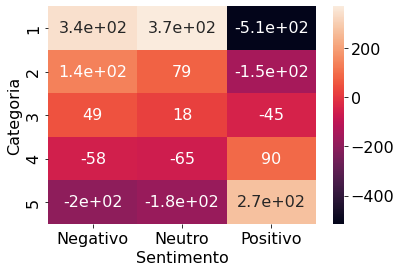

In [19]:
ax = sn.heatmap(std_residue_nota_sentimento, annot=True)
ax.set_ylabel('Categoria', fontsize=16)
ax.set_xlabel('Sentimento', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), size = 16)
ax.set_xticklabels(ax.get_xticklabels(), size = 16)

In [20]:
print(table_categoria_sentimento)
print(table_categoria_nota)
print(table_nota_sentimento)

sentimento       Negativo  Neutro  Positivo
categoria                                  
brinquedo           18667   48498    568673
carro                 431     174      2944
casa                 1379     643      7027
comida                869     413      6155
computador           7030    2414     47479
eletrodomestico       270     139      2678
nota                 1     2      3       4       5
categoria                                          
brinquedo        44101  9454  24138  125665  432480
carro              429   232    595    1219    1074
casa              1588   652   1115    2452    3242
comida             745   472   1002    2263    2955
computador        6103  3943   8712   20029   18136
eletrodomestico    255   176    385     936    1335
sentimento  Negativo  Neutro  Positivo
nota                                  
1              16990   25199     11032
2               3845    3576      7508
3               3202    3511     29234
4               2179    5247    14513

In [39]:
categorias = data['categoria'].value_counts(ascending=False)

cBrinq = categorias['brinquedo'] if 'brinquedo' in categorias else 0 # Número de dados da categoria Brinquedo. Deixar 0 caso não exista a categoria
cCarro = categorias['carro'] if 'carro' in categorias else 0 # Número de dados da categoria Carro. Deixar 0 caso não exista a categoria
cCasa  = categorias['casa'] if 'casa' in categorias else 0 # Número de dados da categoria Casa. Deixar 0 caso não exista a categoria
cComid = categorias['comida'] if 'comida' in categorias else 0 # Número de dados da categoria Comida. Deixar 0 caso não exista a categoria
cCompu = categorias['computador'] if 'computador' in categorias else 0 # Número de dados da categoria Computador. Deixar 0 caso não exista a categoria
cEletr = categorias['eletrodomestico'] if 'eletrodomestico' in categorias else 0 # Número de dados da categoria Eletrodoméstico. Deixar 0 caso não exista a categoria

In [40]:
mca = prince.MCA()

mca = mca.fit(data[['categoria', 'sentimento', 'nota_escrita']])

In [41]:
mca.row_coordinates(data[['categoria', 'sentimento', 'nota_escrita']])

,0,1
0,-0.640252,1.268432
1,-0.640252,1.268432
2,-0.640252,1.268432
3,-0.640252,1.268432
4,-0.596824,0.390554
...,...,...
43158,-0.239441,-0.675602
43159,-0.282869,0.202276
43160,-0.239441,-0.675602
43161,-0.021909,-0.655168


In [42]:
mca.column_coordinates(data[['categoria', 'sentimento', 'nota_escrita']])

,0,1
categoria_brinquedo,-0.757597,1.539763
categoria_carro,-0.464537,-0.786028
categoria_casa,0.203478,0.527108
categoria_comida,0.252207,0.021193
categoria_computador,-0.002805,-0.510856
categoria_eletrodomestico,1.376348,0.415003
sentimento_Negativo,2.966670,0.347992
sentimento_Neutro,0.249006,1.289229
sentimento_Positivo,-0.214576,-0.053046
nota_escrita_Alta,-0.288319,-0.735534


In [36]:
mca = prince.MCA(n_components = 2)

mca = mca.fit(data[['categoria', 'sentimento', 'nota_escrita']]) # same as calling ca.fs_r(1)

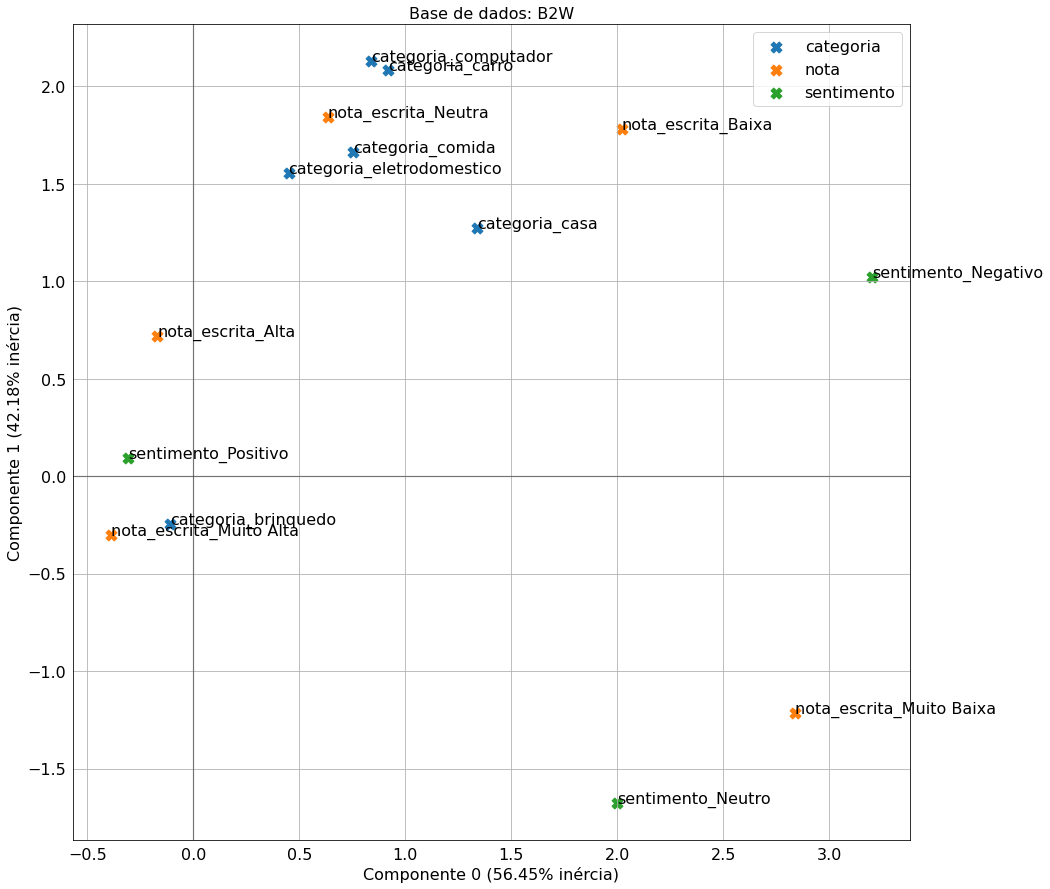

In [37]:
import matplotlib

groups = ['brinquedo']*cBrinq + ['carro']*cCarro + ['casa']*cCasa + ['computador']*cCompu + ['eletrodomestico']*cEletr + ['comida']*cComid

ax = mca.plot_coordinates(
     X=data[['categoria', 'nota_escrita', 'sentimento']],
     ax=None,
     figsize=(15, 15),
     show_row_points=False,
     row_points_size=20,
     show_row_labels=False,
     row_groups=groups,
     show_column_points=True,
     column_points_size=120,
     show_column_labels=True,
     legend_n_cols=1
     )
ax.set_title('Base de dados: B2W', fontsize = 16)
ax.set_ylabel('Componente 1 (' + str(round((mca.eigenvalues_[1]*100), 2)) + "% inércia)", fontsize = 16)
ax.set_xlabel('Componente 0 (' + str(round((mca.eigenvalues_[0]*100), 2)) + "% inércia)", fontsize = 16)


ax.get_figure().savefig('olist_coordinates.png')

In [38]:
mca.total_inertia_

3.6666666666666665

In [39]:
mca.explained_inertia_

[0.15394750660746276, 0.11503415951488928]